In [165]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import scipy.io as sio
import pickle
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from skimage.color import rgb2lab, lab2rgb
import seaborn as sns
sys.path.append('/home/yzy/software2/FINCH-Clustering/python/')
from finch import FINCH
sc.settings.set_figure_params(dpi=80)

/home/yzy/software2/FINCH-Clustering/python/finch.py:13: UserWarning: pyflann not installed: No module named 'index'
  warnings.warn('pyflann not installed: {}'.format(e))


In [2]:
import sys
sys.path.append('/home/yzy/software/pysnic-master')

In [3]:
from pysnic.algorithms.snic import snic


running tsne for SPE1 threshold=0
done!


/home/yzy/anaconda3/envs/tensorflow_clone/lib/python3.6/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 5511 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


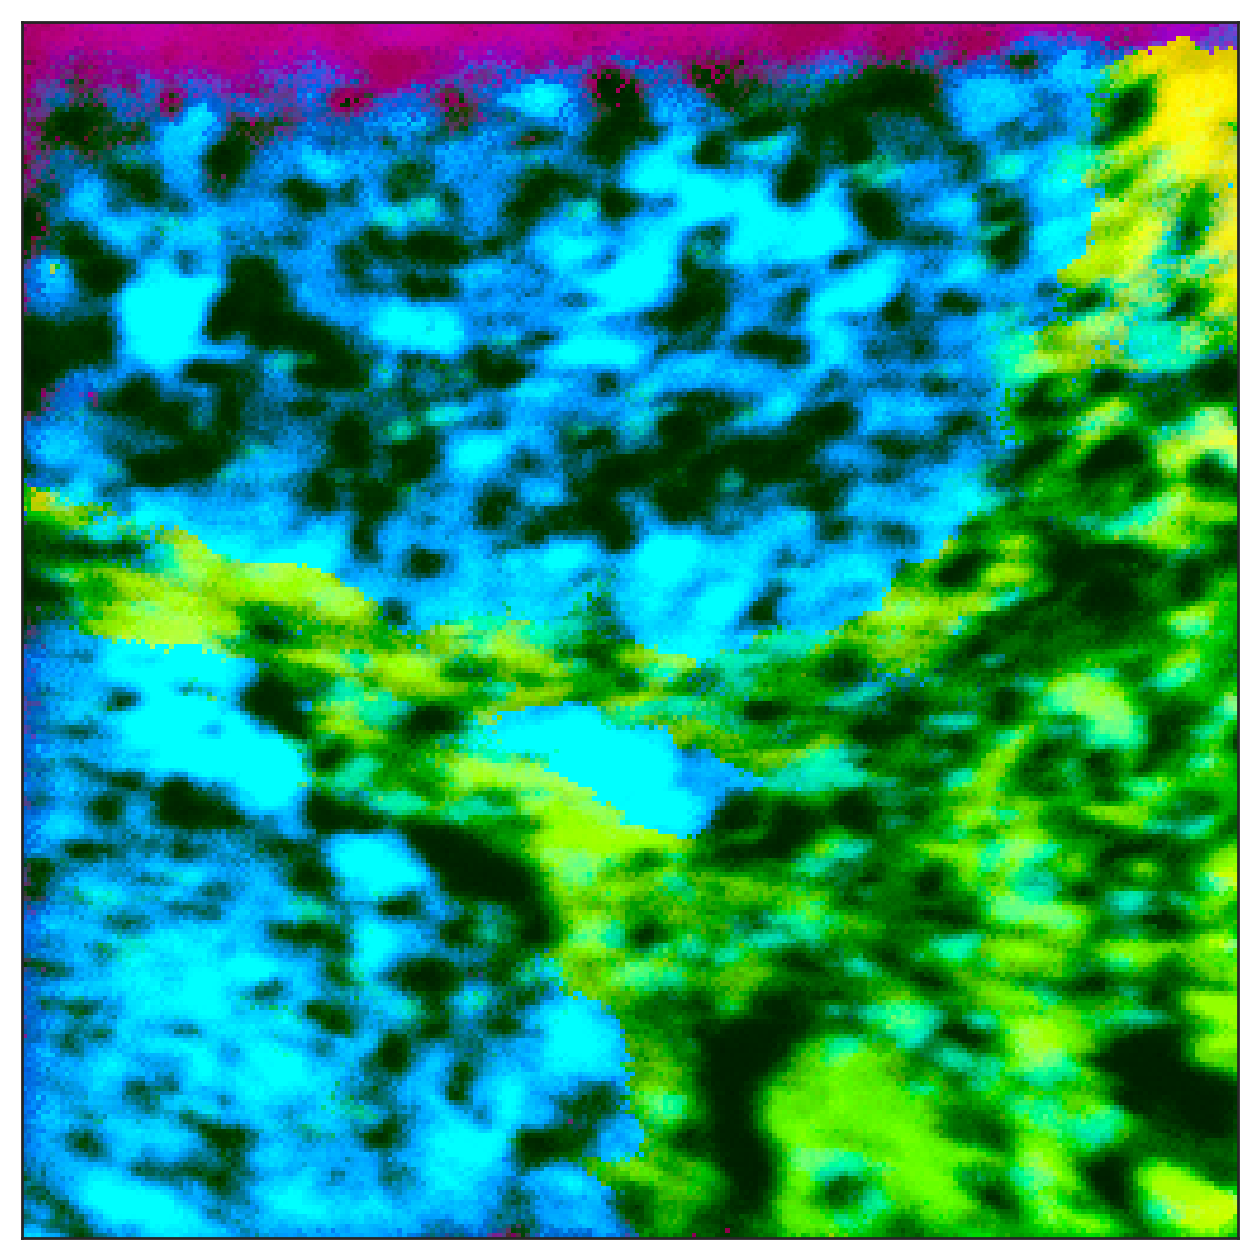

In [110]:
data_name='SPE1'
num_features=718
# data_name='20190115_liverfiber1_filter'
# num_features=198


path_pref='/home/yzy/bioSIMS/data/process/'
bg_threshold=0
figformat='png'
figsize=(10,10)

test_sample_path = '{0}{1}/preprocess/'.format(path_pref,data_name)


test_sample_file = 'test_samples_{0}.mat'.format(str(num_features))

test_sample_file_20 = 'test_samples_20.mat'
test_sample_file = test_sample_path+test_sample_file
test_sample_file_20 = test_sample_path+test_sample_file_20


matters_candidate_file = 'matters_candidate.pkl'
matters_candidate_file = test_sample_path+matters_candidate_file
test_samples = sio.loadmat(test_sample_file)
test_samples = test_samples['test_samples']
test_samples_20 = sio.loadmat(test_sample_file_20)
test_samples_20 = test_samples_20['test_samples']
matters_list = pickle.load(open(matters_candidate_file,'rb'))
pseudo_count = 1

fg_threshold = 50
data_rgb = np.zeros(shape=(65536,3))

data_all = test_samples
data_all_norm = data_all
# data_all_norm = (data_all+pseudo_count)/(np.percentile(data_all,50,axis=1,keepdims=True)+pseudo_count)
data_all_norm = MinMaxScaler().fit_transform(data_all_norm)


data_134 = test_samples_20[:,0]


fg_condition = (data_134>=bg_threshold)

fg_idx = np.where(fg_condition)


print('running tsne for {0} threshold={1}'.format(data_name,str(bg_threshold)))
# fg_umap = TSNE(n_components=3).fit_transform(data_all_norm[fg_condition,:])

fg_umap = umap.UMAP(n_components=3).fit_transform(data_all_norm[fg_condition,:])
print('done!')

# to_plot = fg_umap
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(111, projection='3d')
# tsne_3d_pred = hdbscan.HDBSCAN().fit_predict(to_plot)
# ax.scatter(to_plot[:,0], to_plot[:,1],to_plot[:,2], s=1)
# # plt.scatter(umap_map_data[:,0], umap_map_data[:,1],c='skyblue', s=1)
# cur_save_file = '{0}tsne3d_thres134_{1}_{2}.{3}'.format(save_path,str(bg_threshold),time_str,figformat)
# fig.savefig(cur_save_file,transparent=True,format=figformat,bbox_inches='tight', pad_inches=0)

# ax.view_init(30, 185)
# plt.show()




# fg_umap = fitsne.FItSNE(data_all_norm[data_134>=bg_threshold,:],no_dims=3)
# fg_umap=fast_tsne(data_all_norm[data_134>=bg_threshold,:], perplexity=50, seed=42,map_dims=3)
# fg_umap[np.isnan(fg_umap)] = 0
fg_umap_norm = MinMaxScaler().fit_transform(fg_umap)
fg_umap_norm[:,0] = MinMaxScaler(feature_range=(0, 100)).fit_transform(fg_umap_norm[:,0][:,None])[:,0]
fg_umap_norm[:,1] = MinMaxScaler(feature_range=(-128, 127)).fit_transform(fg_umap_norm[:,1][:,None])[:,0]
fg_umap_norm[:,2] = MinMaxScaler(feature_range=(-127, 128)).fit_transform(fg_umap_norm[:,2][:,None])[:,0]


data_rgb[fg_idx] = fg_umap_norm

data_rgb_img = data_rgb.reshape(256,256,3).astype('float64')
data_rgb_img = lab2rgb(data_rgb_img)
sns.set(style='white')
sns.set_color_codes('deep')

# cur_save_file = '{0}tsnemap_img_thres134_{1}_{2}.{3}'.format(save_path,str(bg_threshold),time_str,figformat)
plt.figure(figsize=figsize)
plt.imshow(data_rgb_img,cmap='BrBG')
plt.xticks([])
plt.yticks([])
plt.show()

In [335]:
color_image.shape

(256, 256, 3)

processed 15.26%
processed 30.52%
processed 45.78%
processed 61.04%
processed 76.29%
processed 91.55%


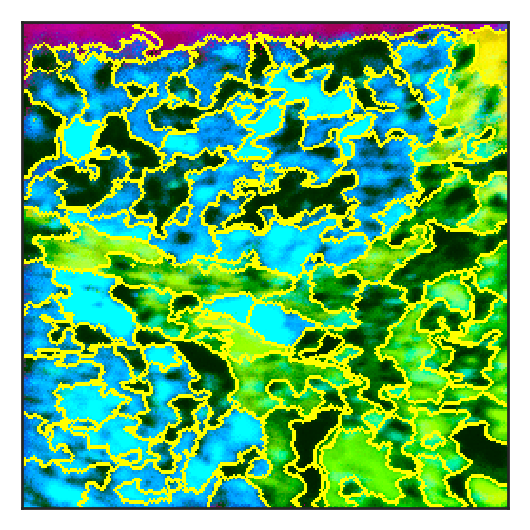

In [112]:
from pkg_resources import resource_stream
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
from skimage.segmentation import mark_boundaries

from pysnic.algorithms.snic import snic


# load image
# color_image = np.array(Image.open(resource_stream(__name__, "/home/yzy/software/pysnic-master/pysnic/data/orchid.jpg")))
# color_image=mpimg.imread("/home/yzy/software/pysnic-master/pysnic/data/orchid.jpg")
color_image = data_rgb_img
lab_image = skimage.color.rgb2lab(color_image).tolist()
number_of_pixels = color_image.shape[0] * color_image.shape[1]

# SNIC parameters
number_of_segments = 100
compactness = 0.1


segmentation, _, number_of_segments = snic(
    lab_image, number_of_segments, compactness,
    update_func=lambda num_pixels: print("processed %05.2f%%" % (num_pixels * 100 / number_of_pixels)))

# show the output of SNIC
fig = plt.figure("SNIC with %d segments" % number_of_segments)
plt.imshow(mark_boundaries(color_image, np.array(segmentation)))
plt.xticks([])
plt.yticks([])
plt.show()

In [346]:
compute_grid

NameError: name 'compute_grid' is not defined

In [344]:
nd_computation = None
image = lab_image
image_size = [len(image), len(image[0])]
label_map = [[-1] * image_size[1] for _ in range(image_size[0])]
if nd_computation is None:
    nd_computation = nd_computations["3"]
nd_lerp = nd_computation.lerp

TypeError: 'NoneType' object is not subscriptable

In [341]:
len(label_map[0])

256

In [28]:
test_samples[:,1].reshape(256,256).shape

(256, 256)

In [35]:
len(matters_list)

198

In [88]:
def make_seg_profile_dict(segmentation,test_samples):
    seg_np = np.array(segmentation)
    unique_seg_id = np.unique(seg_np)
    num_features = test_samples.shape[1]
    seg_profile_dict_list = []
    for i in range(num_features):
        cur_img = test_samples[:,i].reshape(256,256)
        cur_seg_dict = {}
        for j in unique_seg_id:
            cur_profile = np.mean(cur_img[seg_np==j])
            cur_seg_dict[j] = cur_profile
        seg_profile_dict_list.append(cur_seg_dict)
    return seg_profile_dict_list
    
    

In [114]:
def get_spavg_img(matter,seg_profile_dict_list=seg_profile_dict_list,matters_list=matters_list,segmentation=segmentation):
    matters_list = np.array(matters_list)
    matter_idx = np.where(matters_list==matter)[0][0]
    seg_dict = seg_profile_dict_list[matter_idx]
    spavg_img = np.zeros(shape=(256,256))
    seg_np = np.array(segmentation)
    unique_seg_id = np.unique(seg_np)
    for i in unique_seg_id:
        cur_profile = seg_dict[i]
        spavg_img[segmentation==i] = cur_profile
    return spavg_img



In [115]:
def get_gen_repmat(seg_profile_dict_list=seg_profile_dict_list):
    num_genes = len(seg_profile_dict_list)
    seg_ids = list(seg_profile_dict_list[0].keys())
    num_segs = len(seg_ids)
    gen_repmat = np.zeros(shape=(num_genes,num_segs))
    for i in range(num_genes):
        for j in range(num_segs):
            cur_val = seg_profile_dict_list[i][j]
            gen_repmat[i,j] = cur_val
    return gen_repmat

In [113]:
seg_profile_dict_list=make_seg_profile_dict(segmentation,test_samples)

In [120]:
gen_repmat = get_gen_repmat(seg_profile_dict_list=seg_profile_dict_list)

In [121]:
gen_repmat.shape

(718, 121)

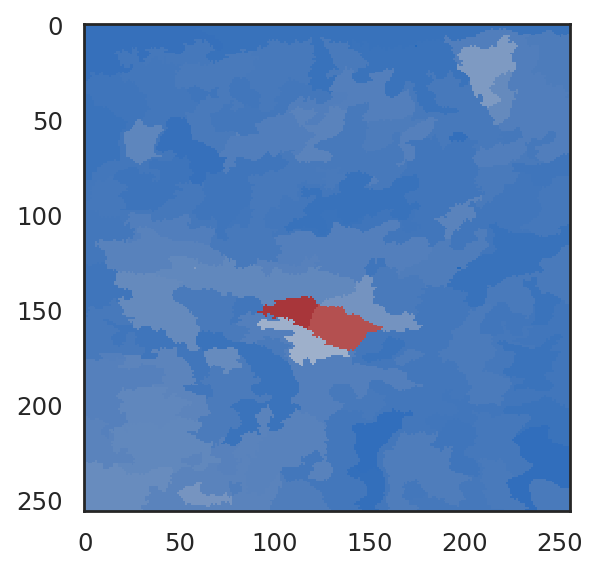

In [116]:
spavg_img = get_spavg_img(114.91)
plt.imshow(spavg_img,cmap='vlag')
plt.show()

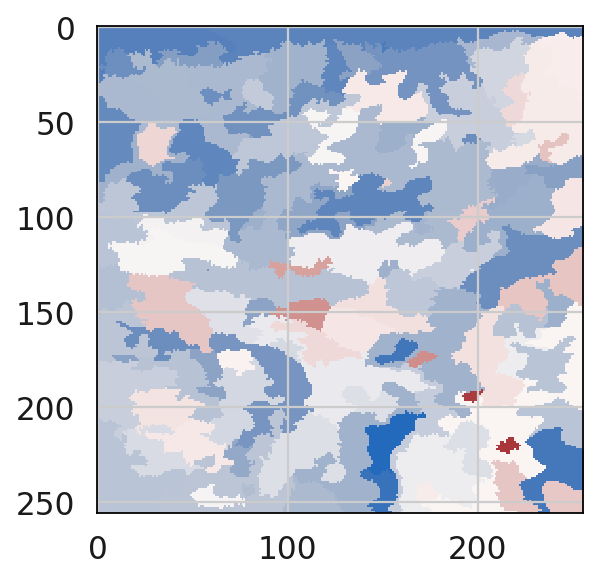

In [205]:
spavg_img = get_spavg_img(134.02)
plt.imshow(spavg_img,cmap='vlag')
plt.show()

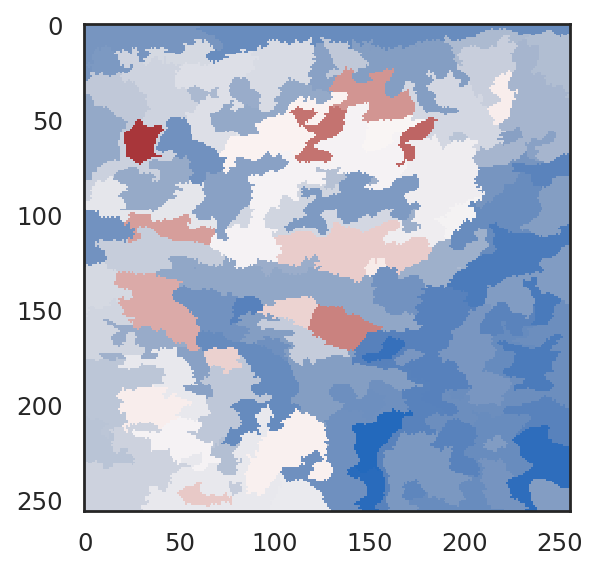

In [119]:
spavg_img = get_spavg_img(86.99)
plt.imshow(spavg_img,cmap='vlag')
plt.show()

In [ ]:
1+1

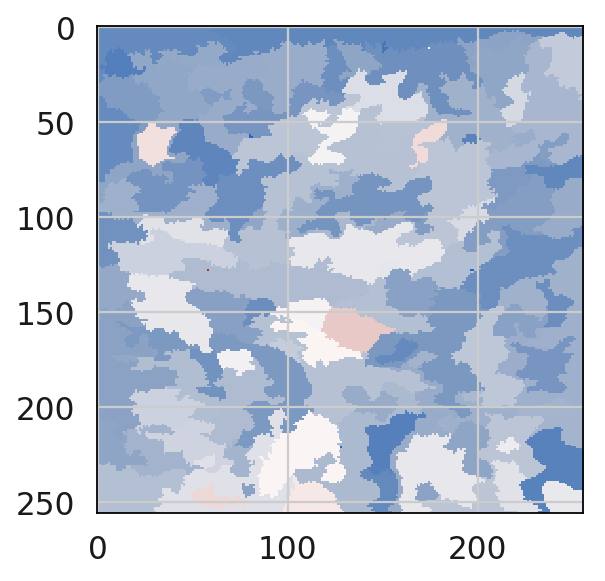

In [201]:
spavg_img = get_spavg_img(83.67)
plt.imshow(spavg_img,cmap='vlag')
plt.show()

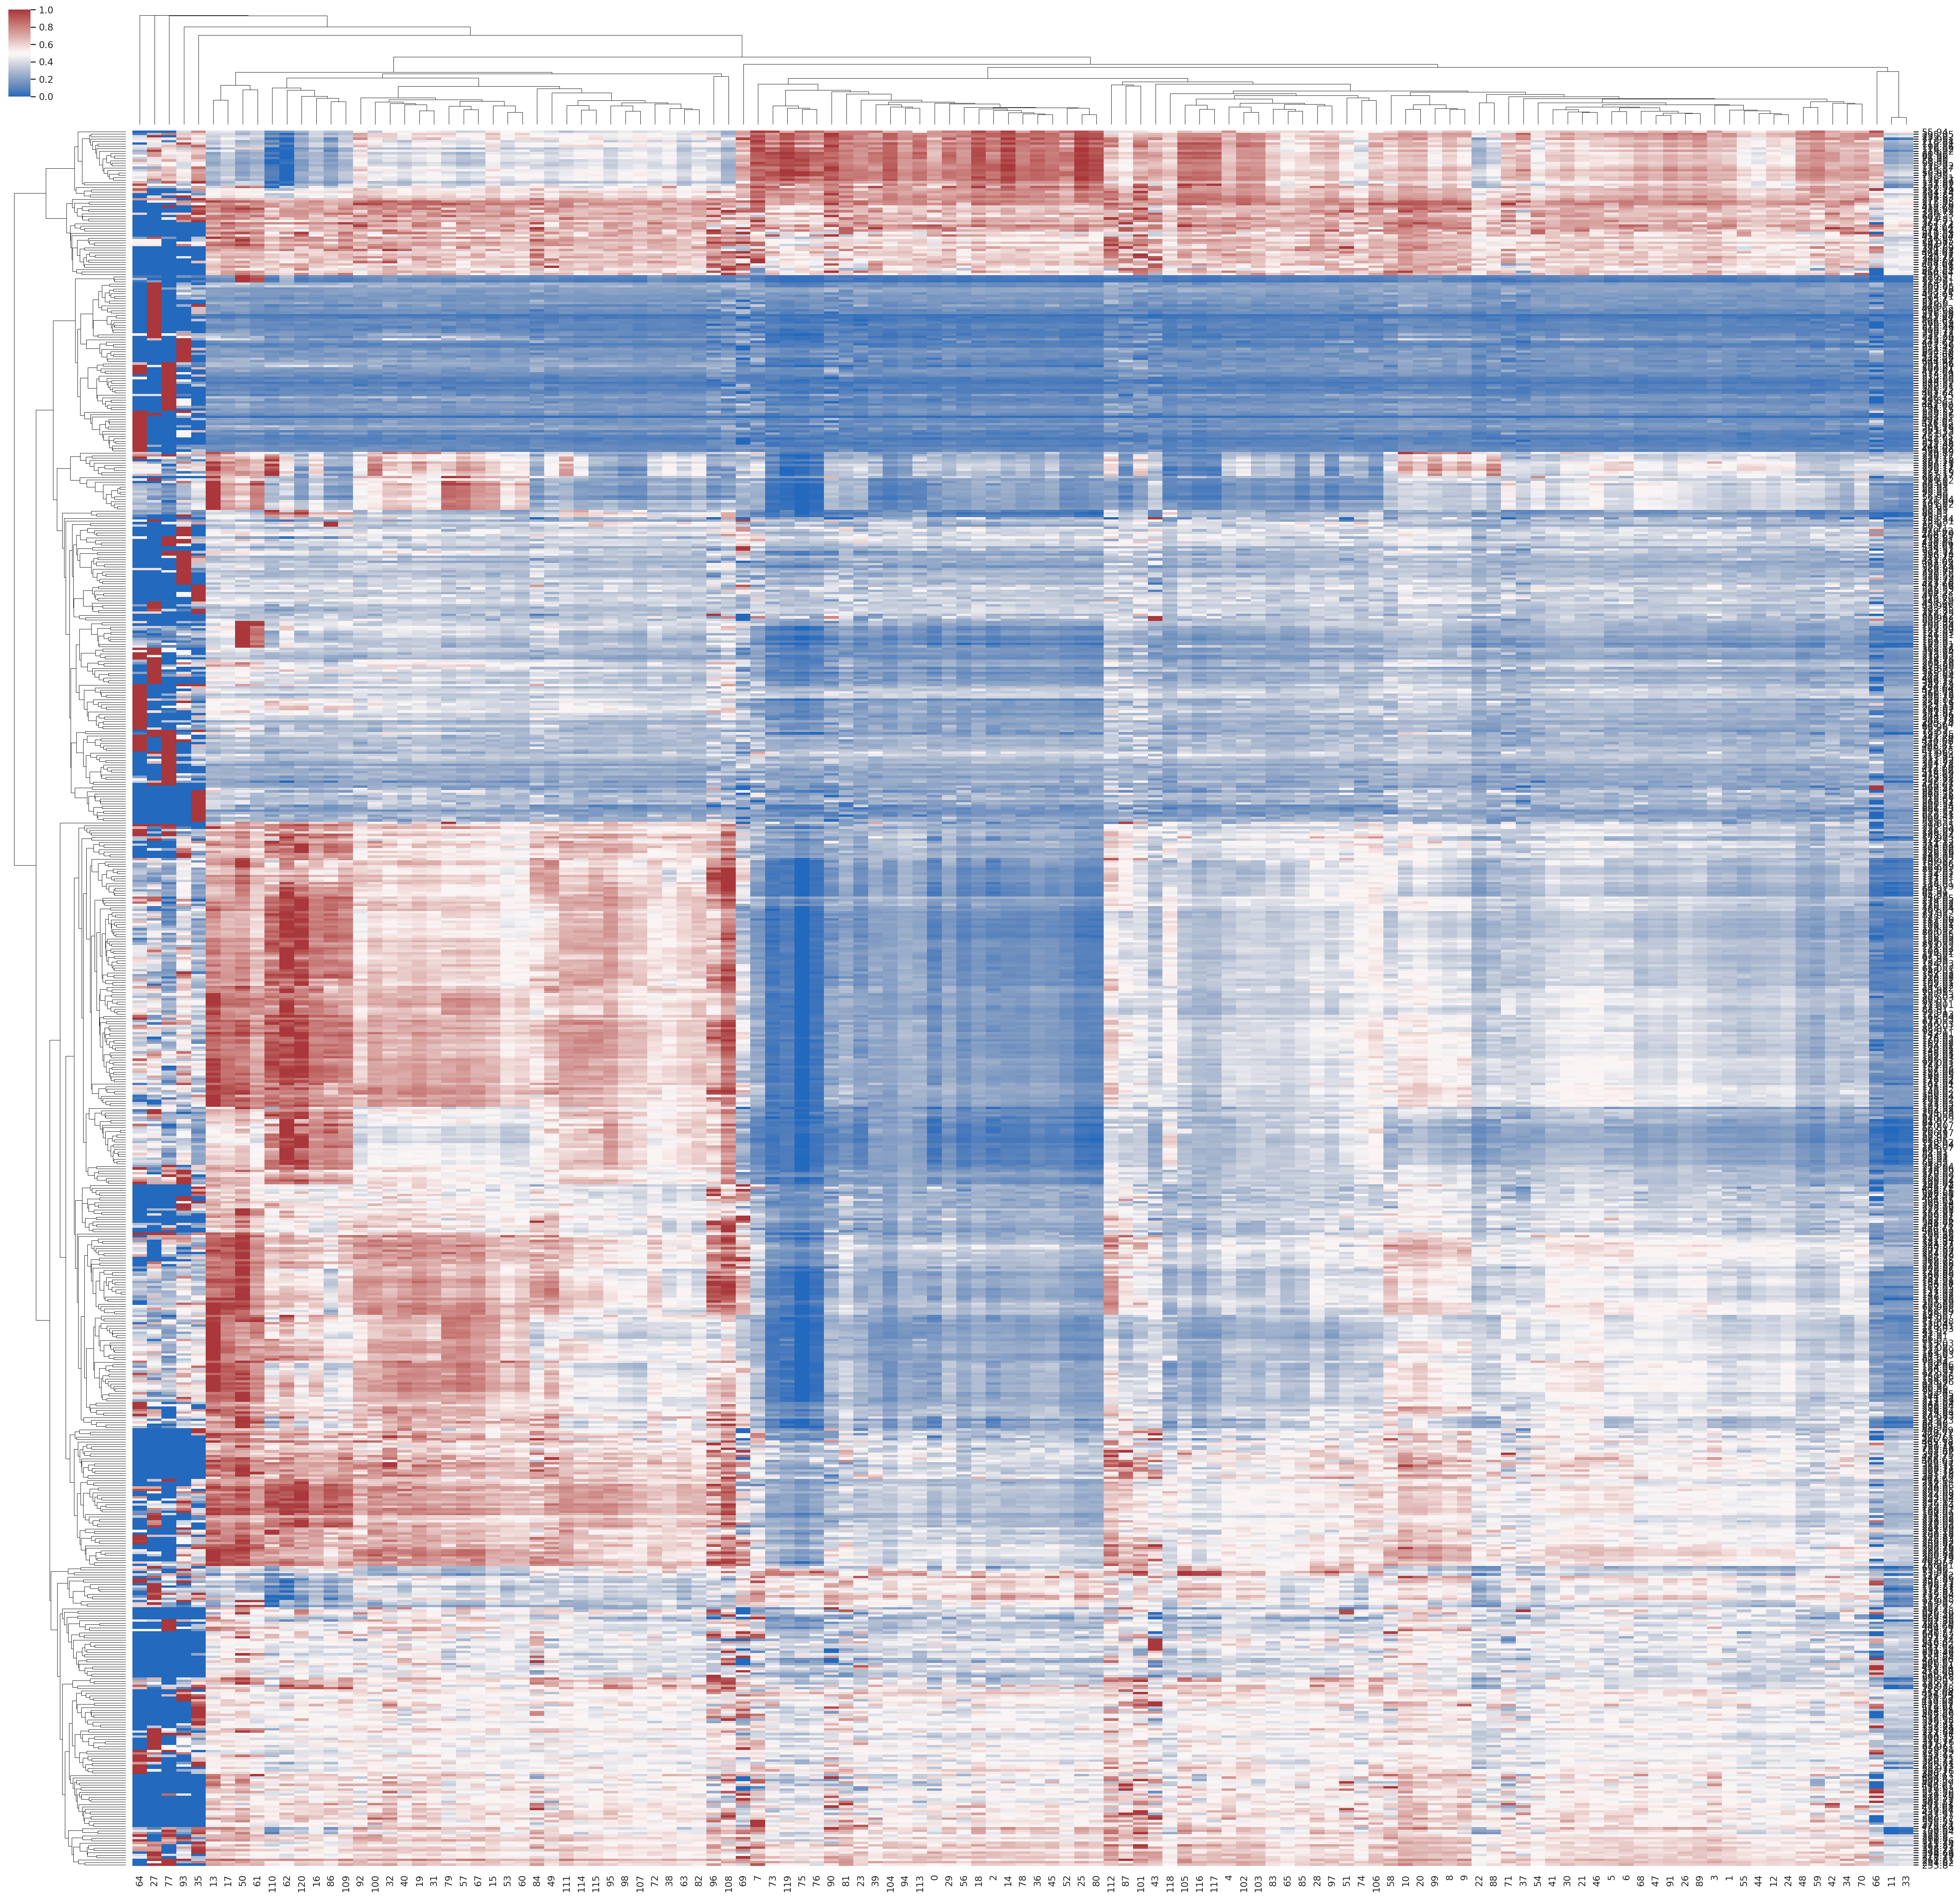

In [122]:
sns.clustermap(data=pd.DataFrame(gen_repmat),figsize=(40,40),row_cluster=True,col_cluster=True,cmap='vlag',yticklabels=matters_list,standard_scale=0)


In [102]:
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils import *

Using TensorFlow backend.


In [182]:
use_gene_rep = gen_repmat
gene_dist = squareform(pdist(use_gene_rep,'correlation'))
# 还可以，在SPE1上还可以，retrieval
# 需要找一个聚类方法，来强调高表达的维度。gini cluster？

In [183]:
int_gene = 114.91
use_dist = gene_dist
gene_list = np.array(matters_list)
int_gene_idx = np.where(gene_list==int_gene)
cur_distance_list = use_dist[int_gene_idx,:]
dist_sort = np.argsort(cur_distance_list)
gene_list[dist_sort]

array([[[114.91, 130.91,  89.92, 169.9 , 167.9 , 146.91, 121.93, 203.85,
         151.9 , 205.84, 185.87, 123.91, 183.89, 129.93, 206.87, 154.91,
         107.92, 222.85, 174.85, 166.89,  84.96, 114.98, 122.9 , 210.98,
         212.89, 128.93,  88.95, 220.85, 221.84, 139.9 , 144.93, 229.84,
         211.87, 134.9 ,  51.99,  56.97,  53.  , 204.86, 148.88, 104.95,
          79.64, 105.96, 202.87, 184.9 , 172.92,  80.96, 228.82,  54.  ,
         119.03,  70.96,  68.99,  51.02,  94.92,  69.99,  89.  , 385.23,
          93.97,  85.02,  71.01, 145.92, 133.33, 246.83, 126.93, 142.91,
         208.88, 199.87, 160.91, 150.96, 224.88,  86.  ,  72.99, 159.45,
         272.97,  72.  , 140.99,  55.01,  96.96, 194.85, 138.96, 207.85,
          91.93,  62.96,  86.95, 175.  , 253.15,  53.04, 143.03, 101.95,
         170.89, 132.9 , 150.02, 143.92,  83.67, 129.01,  95.94, 134.96,
         182.88, 109.96, 111.93, 730.45,  57.03, 189.01, 157.89, 101.02,
          95.01,  88.  , 102.95, 243.04, 194.99, 12

In [129]:
int_gene = 114.91
use_dist = gene_dist
gene_list = np.array(matters_list)
int_gene_idx = np.where(gene_list==int_gene)
cur_distance_list = use_dist[int_gene_idx,:]
dist_sort = np.argsort(cur_distance_list)
gene_list[dist_sort]

array([[[114.91, 130.91,  89.92, 169.9 , 167.9 , 146.91, 151.9 , 205.84,
         203.85, 123.91, 121.93, 183.89, 129.93, 185.87, 206.87, 154.91,
         107.92, 114.98, 166.89,  88.95, 122.9 , 128.93, 222.85, 204.86,
         212.89, 210.98,  69.99,  53.  , 174.85, 148.88, 211.87, 229.84,
          68.99, 144.93,  51.99, 105.96,  79.64,  84.96,  72.99,  56.97,
         133.33,  55.01, 228.82, 385.23, 139.9 ,  83.67, 104.95,  94.92,
         172.92, 140.99,  54.  ,  80.96, 159.45, 184.9 ,  85.02,  89.  ,
          71.01,  86.  , 101.02,  58.  ,  93.97,  70.96, 119.03, 150.96,
         253.15, 142.91, 224.88,  51.02,  86.95, 208.88,  53.04, 246.83,
         145.92, 111.93, 129.01, 346.77, 143.92, 134.96, 272.97, 170.89,
         109.96, 143.03, 126.93,  86.99,  72.  , 243.04, 202.87, 127.92,
         150.02,  57.03,  96.96, 286.8 , 182.88, 189.01, 322.79,  88.  ,
          59.01,  95.94,  95.01, 138.96, 220.85, 424.72, 207.85, 175.  ,
         194.99, 165.89, 408.72, 730.45, 306.8 ,  8

In [130]:
#被我吊打

use_gene_rep = np.transpose(test_samples)
gene_dist = squareform(pdist(use_gene_rep,'cosine'))

int_gene = 114.91
use_dist = gene_dist
gene_list = np.array(matters_list)
int_gene_idx = np.where(gene_list==int_gene)
cur_distance_list = use_dist[int_gene_idx,:]
dist_sort = np.argsort(cur_distance_list)
gene_list[dist_sort]


array([[[114.91, 130.91,  89.92, 167.9 , 169.9 , 146.91, 121.93, 151.9 ,
         123.91, 129.93, 183.89,  80.96, 104.95, 105.96, 148.88, 114.98,
          96.96, 128.93,  95.94, 127.92, 143.92,  71.01, 142.91, 144.93,
          62.96, 111.93, 153.03,  68.99, 109.96,  85.02, 122.99, 111.01,
          53.  , 164.88, 145.92,  86.95, 107.92,  89.  , 150.02, 150.96,
          65.  , 133.  ,  79.95, 119.03, 180.87,  86.  ,  88.95,  51.02,
         149.  ,  94.92,  89.99,  67.02,  72.99,  95.01,  65.99,  72.  ,
         182.88, 138.96, 102.95,  93.01,  79.64,  81.97,  62.  , 131.01,
          88.  ,  93.97, 113.03, 169.05,  83.01,  55.01, 158.89,  58.  ,
          64.  , 101.95, 163.  , 137.  ,  73.99,  99.01,  74.98, 117.  ,
          97.03,  92.01, 114.01, 166.89, 106.01, 116.02, 198.87, 135.02,
          78.95,  84.  ,  95.99, 134.96, 132.01, 160.91, 175.  ,  56.97,
         134.02, 281.17, 125.03,  69.03,  59.01, 147.01, 165.01, 101.02,
         132.9 ,  70.03, 155.06, 122.01, 154.03, 13

In [137]:
np.unique(gene_SIMLR)

array([1., 2., 3., 4., 5., 6., 7.])

In [ ]:
gene_SIMLR,_ = SIMLR(gen_repmat,-10)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=42,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=1)
Construct fuzzy simplicial set
Sun Feb 23 11:38:24 2020 Finding Nearest Neighbors
Sun Feb 23 11:38:24 2020 Finished Nearest Neighbor Search
Sun Feb 23 11:38:24 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  

No handles with labels found to put in legend.


500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Feb 23 11:38:26 2020 Finished embedding


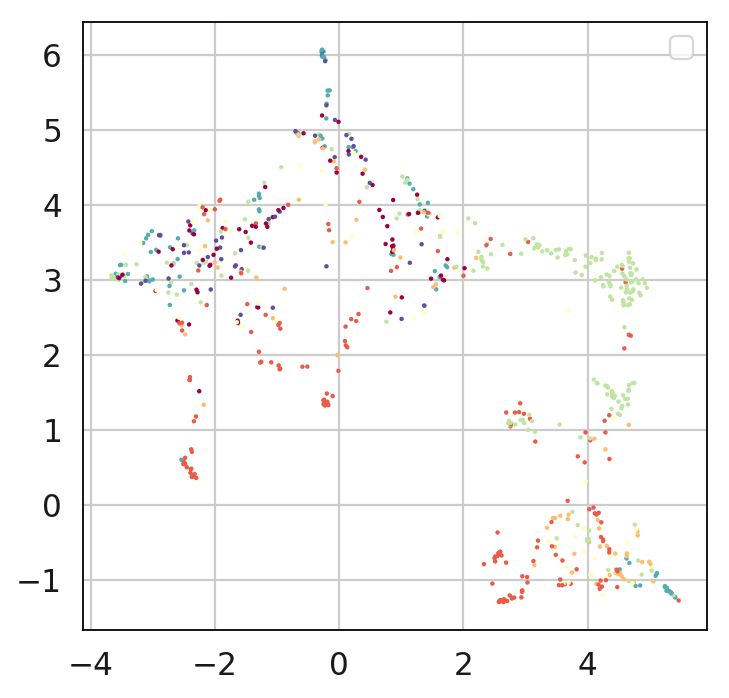

In [211]:
reducer = umap.UMAP(random_state=42,verbose=1,n_neighbors=20,min_dist=0,n_components=2,metric='euclidean')
embedding = reducer.fit_transform(use_rep)
# pred_y = GaussianMixture(n_components=num_clusters).fit_predict(embedding)
pred_y = gene_SIMLR
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(
    embedding[:, 0], embedding[:, 1], c=pred_y, cmap="Spectral", s=1
)

ax.legend()
plt.show()

In [166]:
c, num_clust, req_c = FINCH(gen_repmat, initial_rank=None, req_clust=10, distance='cosine', verbose=True)


Partition 0: 104 clusters
Partition 1: 23 clusters
Partition 2: 5 clusters
Partition 3: 3 clusters


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='correlation',
   metric_kwds=None, min_dist=0, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=42,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=1)
Construct fuzzy simplicial set
Sat Feb 22 15:54:16 2020 Finding Nearest Neighbors
Sat Feb 22 15:54:16 2020 Finished Nearest Neighbor Search
Sat Feb 22 15:54:16 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Feb 22 15:54:18 2020 Finish

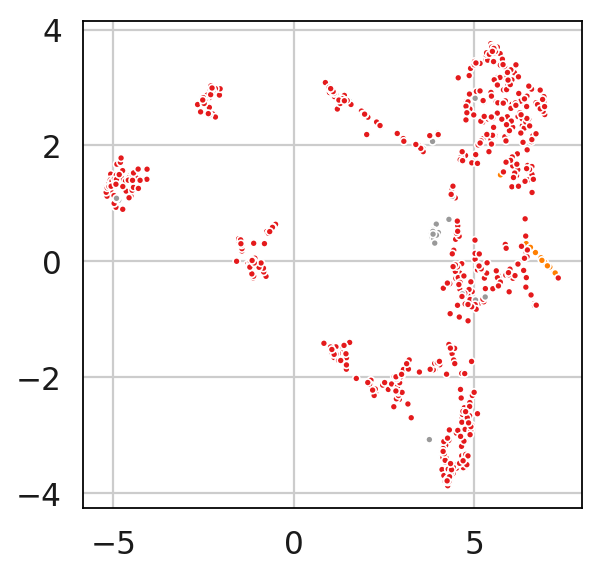

In [199]:
reducer = umap.UMAP(random_state=42,verbose=1,n_neighbors=20,min_dist=0,n_components=2,metric='correlation')
embedding = reducer.fit_transform(gen_repmat)
pred_y = SPE1_cluster_manual
sns.scatterplot(x=embedding[:, 0],y=embedding[:, 1],hue=pred_y,palette='Set1',s=10,legend=False)

In [169]:
use_cls = c[:,1]
int_idx = np.where(np.array(matters_list)==114.91)
use_cls[int_idx]

array([16], dtype=int32)

In [171]:
np.array(matters_list)[use_cls==16]

array([ 89.92, 114.91, 130.91])

In [162]:
np.unique(gene_SIMLR,return_counts=1)

(array([1., 2., 3., 4., 5., 6., 7.]),
 array([ 68, 180,  67,  51, 209,  91,  52]))

In [206]:
np.sum(gen_repmat,axis=1).shape

(718,)

In [209]:
save_path = 'test/online_projection/'
save_file = 'SPE1_snic_100_0p1_rowminmax'
use_rep = gen_repmat
use_rep = use_rep/np.sum(gen_repmat,axis=1,keepdims=1)

with open(save_path+save_file+'_mtx','w') as f:
    for i in range(use_rep.shape[0]):
        cur_line = '\t'.join(list(gen_repmat[i].astype('str')))
        cur_line+='\n'
        f.write(cur_line)

In [195]:
use_cls = gene_SIMLR
with open(save_path+save_file+'_meta','w') as f:
    f.write('name'+'\t'+'cls'+'\t'+'manual'+'\n')
    for i in range(use_rep.shape[0]):
        cur_name = str(matters_list[i])
        cur_cls = str(use_cls[i])
        cur_manual = str(SPE1_cluster_manual[i])
        cur_line = cur_name+'\t'+cur_cls+'\t'+cur_manual+'\n'
        f.write(cur_line)

In [191]:
def get_list_idx(list1,list2):
    list1 = np.array(list1)
    list2 = np.array(list2)
    rst_idx = []
    for i in list1:
        cur_idx = np.where(list2==i)[0][0]
        rst_idx.append(cur_idx)
    return np.array(rst_idx)

In [190]:
get_list_idx(c_87,matters_list)

[3,
 6,
 8,
 9,
 14,
 20,
 23,
 26,
 48,
 51,
 54,
 56,
 78,
 82,
 84,
 86,
 113,
 134,
 142,
 163,
 189,
 319]

In [193]:
c_87 = [51.02,51.99,53,53.04,55.01,56.99,58,59.01,68.99,69.99,71.01,72.99,83.67,85.02,86,86.99,101.02,114.98,119.03,
       129.01,140.99,221.04,]
c_114 = [89.92,91.93,107.92,114.91,121.93,122.90,123.91,128.93,129.93,130.91,132.90,134.90,139.90,146.91,
        151.90,154.91,163.88,167.90,169.90,174.85,183.89,185.87,203.85,204.86,205.84,206.87,220.85,221.84,222.85,]

idx_87 = get_list_idx(c_87,matters_list)
idx_114 = get_list_idx(c_114,matters_list)

SPE1_cluster_manual = np.zeros(shape=(len(matters_list),))
SPE1_cluster_manual[idx_87] = 1
SPE1_cluster_manual[idx_114] = 2


In [194]:
np.unique(SPE1_cluster_manual,return_counts=1)

(array([0., 1., 2.]), array([667,  22,  29]))

### 得到gene_repmat之后，如何聚类？
##### 问题：重要的特征（segment）少于不重要的。
##### 重要特征有哪些特点？内部pixel variance小；几个重要特征成比例；
##### 选重要的特征：内部pixel的variance／gini index／FP growth

### 如何写文章：
##### 哪些数据：SIMS／MALDI／DESI／slide-seq／HDST／seqFish+
##### positive control：已知的共同通路基因／代谢物，用我们的方法检测出距离近（相比其他的基因距离）；或者已有文献举出来的类，用DE找差异对物质的排序
##### 生物学问题：通过基因距离得到猜测未知基因的功能，并成功验证；发现a cluster of genes共同和疾病有关（vs利用细胞聚类+DE分析找基因）


In [218]:
in_X.shape[1]

718

In [271]:
in_X = gen_repmat
# in_X = np.transpose(test_samples)
obs_name = list(map(str,matters_list))
g = map(str,range(in_X.shape[1]))
# g = gene_list

obs = pd.DataFrame(index=obs_name)

# var_name must be str
var = pd.DataFrame(index=g)

# obs['true_labels'] = np.array(tenx_73k_label)
# obs['true_labels'] = obs['true_labels'].astype('category')
#     var['Genes'] = Genes
adata = ad.AnnData(in_X,  obs=obs,var=var, dtype='float32')


In [272]:

adata.uns.pop('man_colors',None)
adata.obs['man'] = SPE1_cluster_manual.astype('str')

In [273]:

adata.uns.pop('SIMLR_colors',None)
adata.obs['SIMLR'] = gene_SIMLR.astype('str')

In [281]:
sc.pp.normalize_per_cell(adata)
# sc.pp.log1p(adata)


In [282]:
sc.tl.pca(adata, svd_solver='arpack')

In [283]:
sc.pp.neighbors(adata, n_neighbors=10)

In [284]:
sc.tl.umap(adata)

In [300]:
sc.tl.paga(adata)

In [298]:
sc.tl.draw_graph(adata)

In [327]:
sc.tl.louvain(adata)

In [306]:
import matplotlib
matplotlib.__version__

'3.0.3'

AttributeError: module 'matplotlib.cbook' has no attribute 'is_string_like'

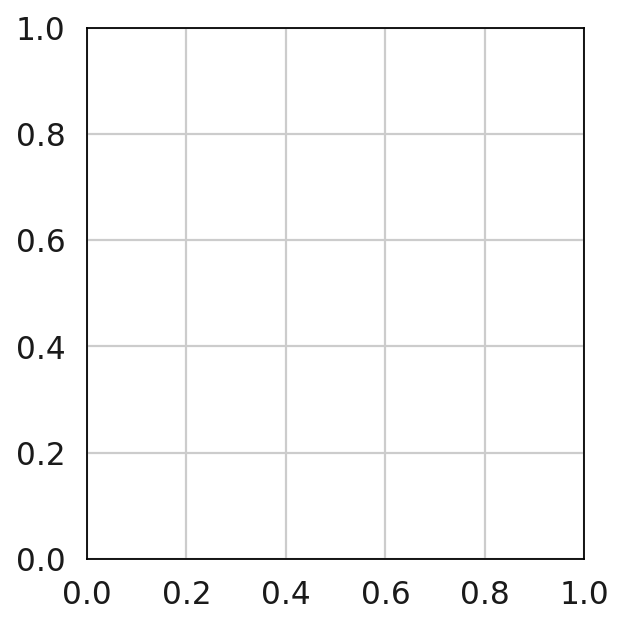

In [303]:
sc.pl.paga(adata)

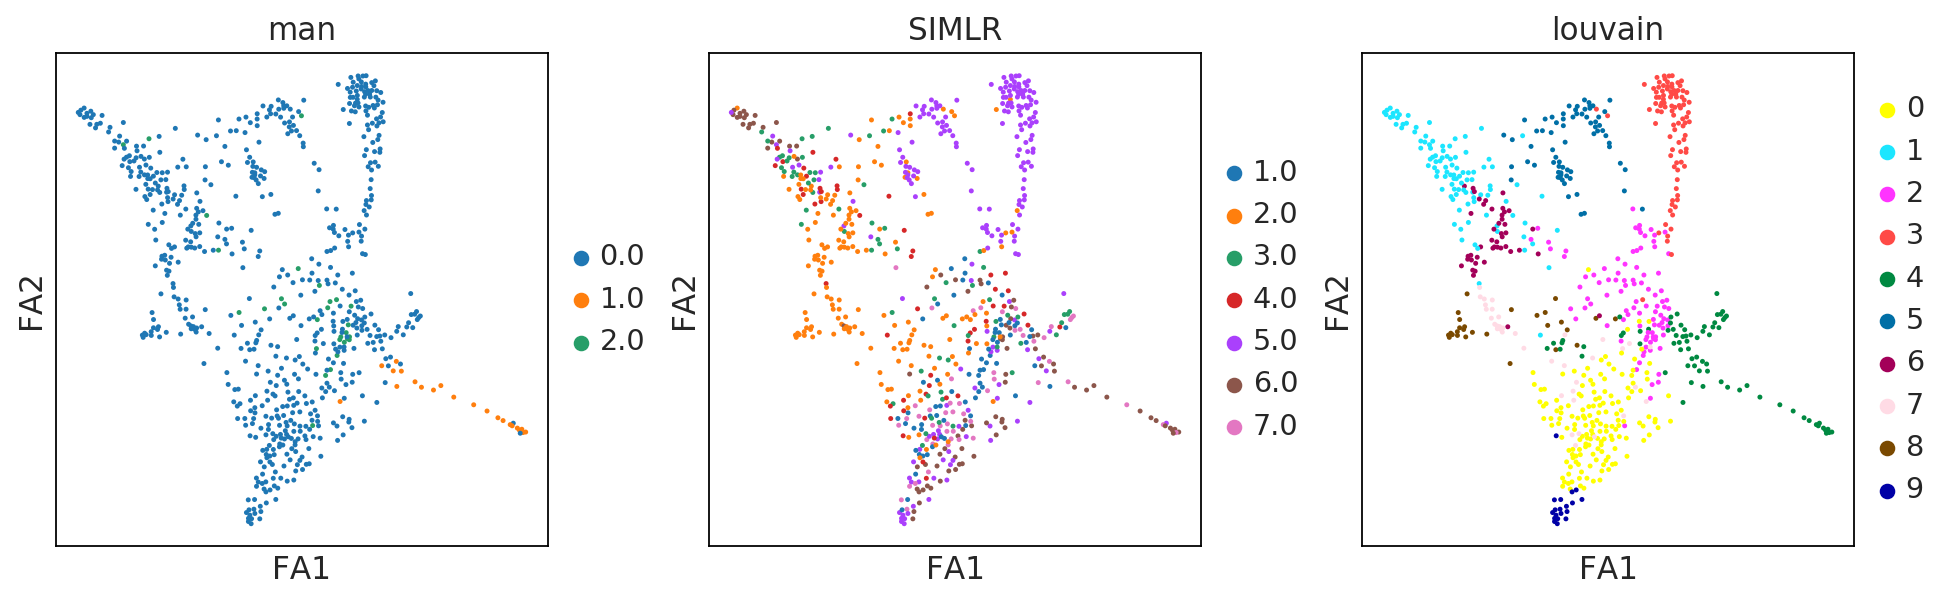

In [328]:
sc.pl.draw_graph(adata, color=['man','SIMLR','louvain'],s=20,)

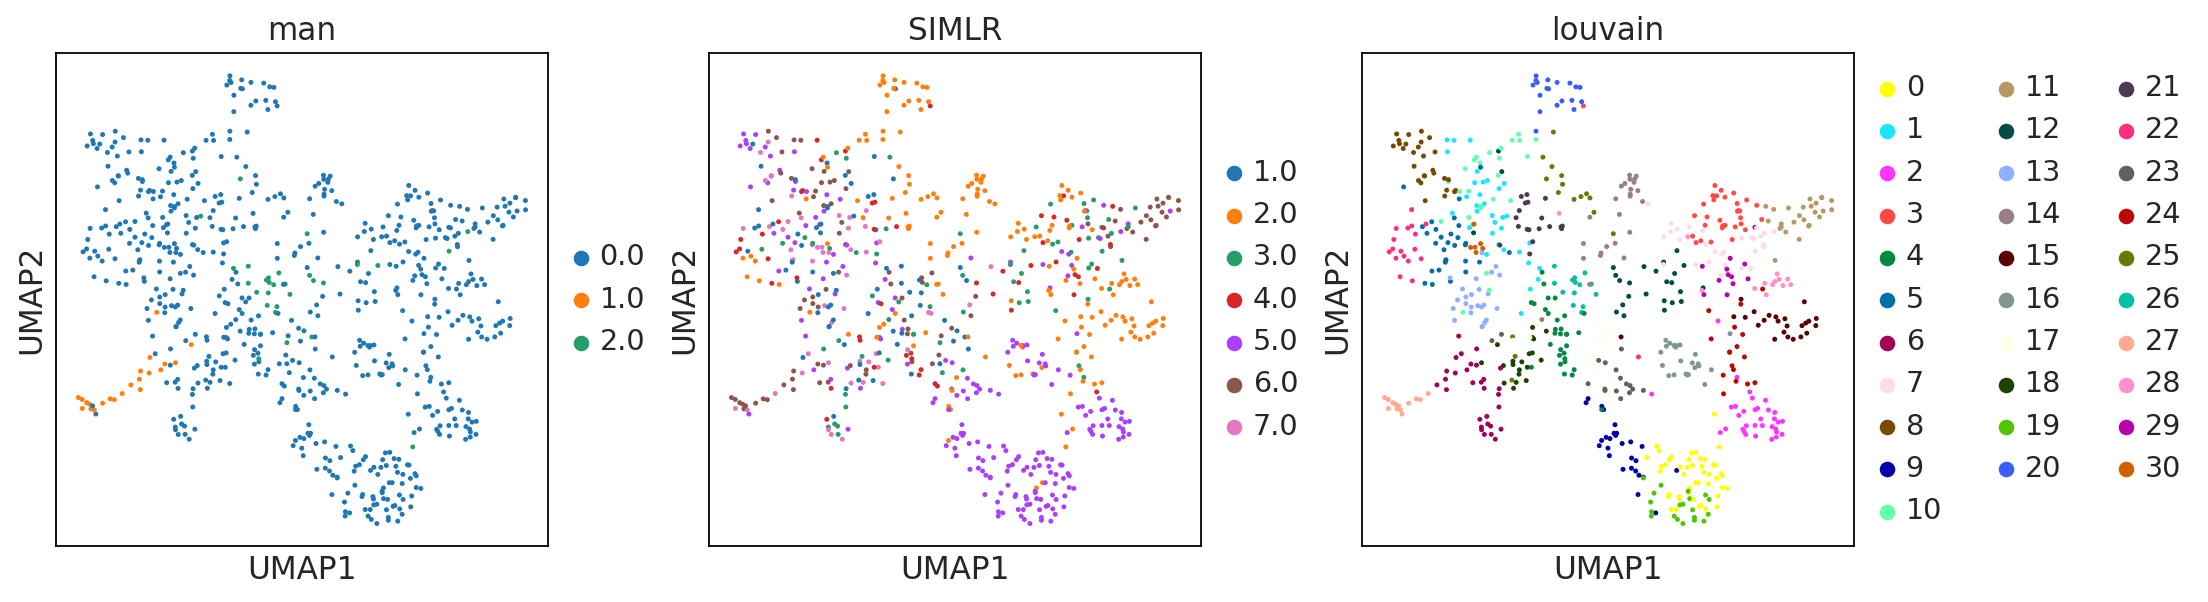

In [312]:
sc.pl.umap(adata, color=['man','SIMLR','louvain'],s=20,)

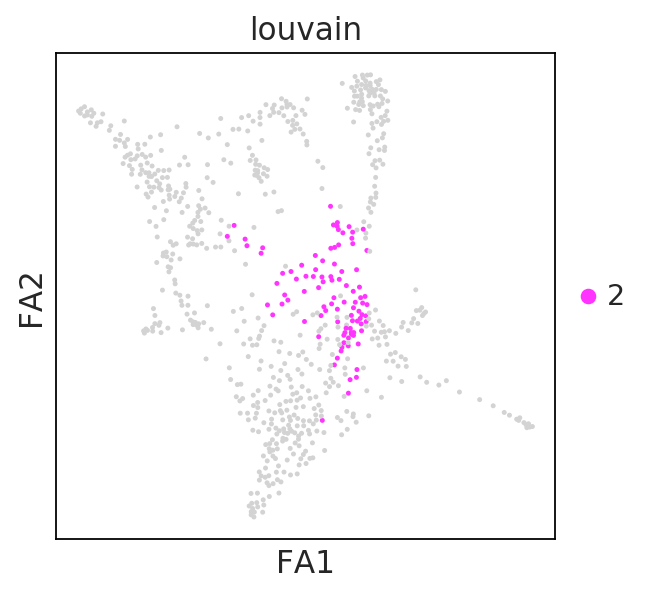

In [331]:
sc.pl.draw_graph(adata, color=['louvain'],s=20,groups=['2'])

In [329]:
use_cls = adata.obs['louvain']
int_idx = np.where(np.array(matters_list)==134.02)[0][0]
use_cls[int_idx]

'2'

In [330]:
np.array(matters_list)[use_cls=='2']

array([ 62.96,  70.96,  78.95,  86.95,  88.95,  89.92, 101.95, 102.95,
       105.96, 106.01, 111.93, 114.91, 117.  , 121.93, 123.91, 126.93,
       127.92, 129.93, 130.91, 131.01, 132.01, 133.  , 133.33, 134.02,
       139.9 , 140.92, 142.91, 143.92, 146.91, 148.88, 149.  , 150.02,
       151.9 , 156.91, 157.89, 158.89, 159.45, 160.91, 161.91, 163.88,
       164.88, 166.89, 167.9 , 169.9 , 180.87, 181.87, 183.89, 185.87,
       193.85, 194.85, 198.87, 200.88, 202.87, 203.85, 205.84, 206.87,
       207.85, 220.85, 222.85, 228.82, 240.83, 242.84, 260.81, 261.81,
       262.83, 266.84, 276.79, 282.82, 284.82, 290.78, 292.77, 300.79,
       301.78, 306.8 , 308.76, 316.76, 322.79, 344.77, 348.74, 362.75,
       366.04, 370.72, 384.75, 402.73, 403.71, 404.71, 424.72, 448.69,
       464.67, 486.67, 504.65, 508.61, 542.59, 548.62, 628.56, 887.3 ])